In [1]:
import os
from dataclasses import dataclass
from datetime import datetime
from typing import List

from gorillatracker.utils.video_models import VideoDataset


@dataclass
class Image:
    gorilla_id: str
    camera_id: str
    data: datetime


def extract_image_info(image_names) -> List[Image]:
    images = []
    for image_name in image_names:
        try:
            gorilla_id, camera_id, date_str, _ = image_name.split("_")
            date = datetime.strptime(date_str, "%Y%m%d")
            images.append(Image(gorilla_id, camera_id, date))
        except ValueError:
            print(f"Could not parse {image_name}")
            continue
    return images


video_dataset_path = "../data/derived_data/videos.jsonl"
image_path = "../data/ground_truth/cxl/full_images"
image_names = os.listdir(image_path)

video_dataset = VideoDataset(video_dataset_path)
images = extract_image_info(image_names)

camera_ids = set(map(lambda v: v.camera_id, video_dataset.videos))
gorilla_ids = set(map(lambda i: i.gorilla_id, images))

Loading videos: 1419Videos [42:06,  1.78s/Videos]                        

Could not parse YE01_R035_20191012_079 _son.png
Could not parse GR01_R065_20181202_328gr_son.png


In [5]:
print(camera_ids)
print(gorilla_ids)
print(len(images))
print(len(video_dataset.videos))

{'R065', 'R105', 'R066', 'R185', 'R106', 'Trc099', 'Trc154', 'R018', 'R050', 'R019', 'R008', 'Trc143', 'R510', 'R051', 'R505', 'R014', 'R224', 'R035', 'R033', 'R198', 'Tm002', 'R506', 'R118', 'R020', 'R103', 'R111', 'R172', 'R502', 'M002', 'R501', 'R030', 'R169', 'R092', 'R507', 'R508', 'R108', 'R465', 'R146', 'R178', 'R040'}
{'US43', 'TU03', 'HU25', 'US40', 'US41', 'PL01', 'AY00', 'PL03', 'TU00', 'GR00', 'HU22', 'MU00', 'AP03', 'GA40', 'NN01', 'DU40', 'HU40', 'PL00', '0E00', 'OE41', 'OE40', 'PL43', 'PV00', 'PL02', 'RC43', 'AP40', 'TU41', 'ZU05', 'ES03', 'ES00', 'RC60', 'Du01', 'JZ20', 'S45', 'US04', 'YE02', 'DU60', 'ES01', 'b0', 'RC20', 'TU06', 'HU21', 'NN00', 'TU04', 'JP60', 'US03', 'YE00', 'ME00', 'PL60', 'PL42', 'JP00', 'PL46', 'AP00', 'NN20', 'OE02', 'US01', 'NN60', 'ME60', 'PL44', 'RC21', 'ZU06', 's92', 'RC01', 'YE01', 'JZ40', 'AP61', 'JZ41', 'GR01', 'DU01', 'HU00', 'JB00', 'NN44', 'TU02', 'NN61', 'GA00', 'HU23', 'NN40', 'RC02', 'AY04', 'YE03', 'TU60', 'PL40', 'NN43', 'PL47', 'RC

In [2]:
clips = [clip for video in video_dataset.videos for clip in video.clips]
clips.sort(key=lambda c: c.tracked_gorillas())

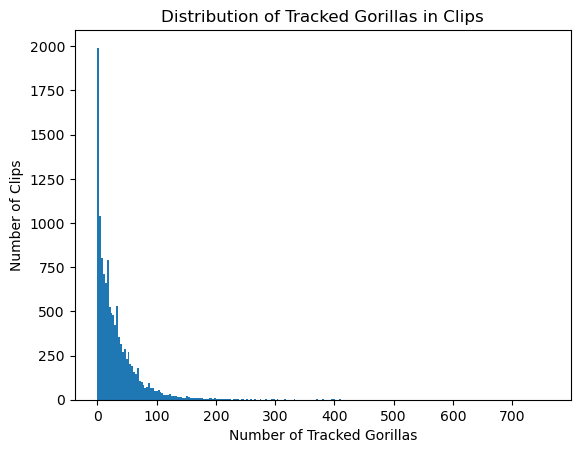

In [3]:
import matplotlib.pyplot as plt

# Get the number of tracked gorillas for each clip
num_tracked_gorillas = [clip.tracked_gorillas() for clip in clips]

# Create a histogram
plt.hist(num_tracked_gorillas, bins="auto")

# Set the title and labels
plt.title("Distribution of Tracked Gorillas in Clips")
plt.xlabel("Number of Tracked Gorillas")
plt.ylabel("Number of Clips")

# Show the plot
plt.show()

In [44]:
import random
import math

weights = [math.pow(clip.tracked_gorillas(), 2) for clip in clips]

# Normalize weights to sum to 1
total_weight = sum(weights)
normalized_weights = [w/total_weight for w in weights]

# Use random.choices to sample based on the weights
selected_clips = random.choices(clips, weights=normalized_weights, k=500)
selected_clips.extend(random.choices(clips, k=500))

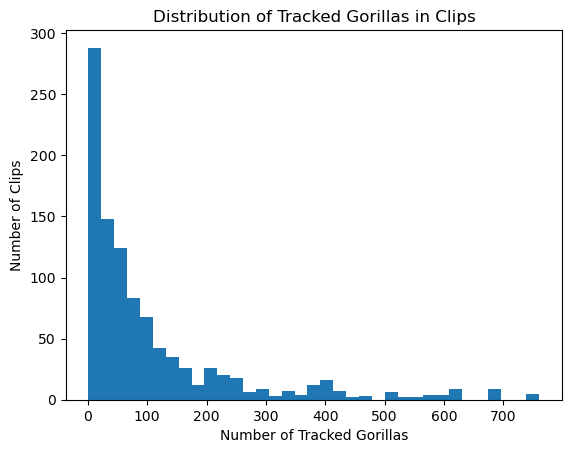

In [45]:
num_tracked_gorillas = [clip.tracked_gorillas() for clip in selected_clips]

# Create a histogram
plt.hist(num_tracked_gorillas, bins="auto")

# Set the title and labels
plt.title("Distribution of Tracked Gorillas in Clips")
plt.xlabel("Number of Tracked Gorillas")
plt.ylabel("Number of Clips")

# Show the plot
plt.show()

In [46]:
video_dir = "/workspaces/gorillatracker/video_data"
with open("/workspaces/gorillatracker/data/derived_data/spac_gorillas_cvat_data/selected_clips.txt", "w") as f:
    for clip in sorted(selected_clips, key=lambda c: c.tracked_gorillas(), reverse=True):
        f.write(os.path.join(video_dir, f"{clip.video_id}.mp4") + "\n")

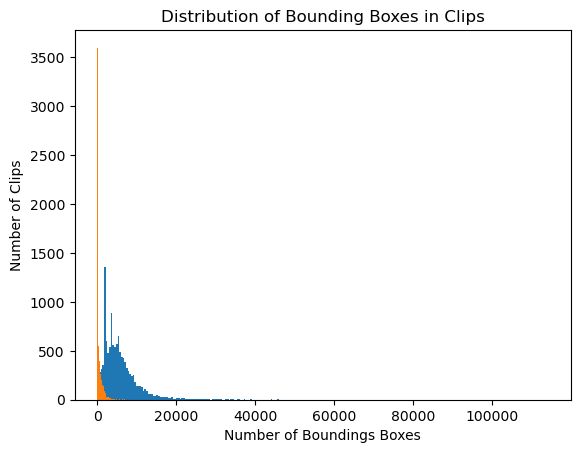

In [64]:
from gorillatracker.utils.video_models import TrackerType

# plt.hist([clip.tracked_gorilla_frames(TrackerType.GORILLA) for clip in clips], bins="auto", log=True)
plt.hist([sum([len(tracking.bounding_boxes) for tracking in clip.trackings]) for clip in clips], bins="auto")
plt.hist([sum([len(tracking.bounding_boxes_face) for tracking in clip.trackings]) for clip in clips], bins="auto")

# Set the title and labels
plt.title("Distribution of Bounding Boxes in Clips")
plt.xlabel("Number of Boundings Boxes")
plt.ylabel("Number of Clips")

# Show the plot
plt.show()

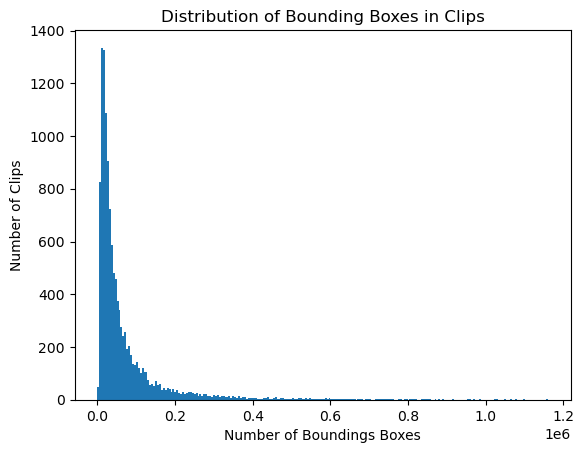

In [66]:
from gorillatracker.utils.video_models import TrackerType

# plt.hist([clip.tracked_gorilla_frames(TrackerType.GORILLA) for clip in clips], bins="auto", log=True)
plt.hist([clip.avg_bbox_size() for clip in clips], bins="auto")
# plt.hist(clip.avg_bbox_size() for tracking in clip.trackings) for clip in clips], bins="auto")

# Set the title and labels
plt.title("Distribution of Bounding Boxes in Clips")
plt.xlabel("Number of Boundings Boxes")
plt.ylabel("Number of Clips")

# Show the plot
plt.show()

0.03379564204343219


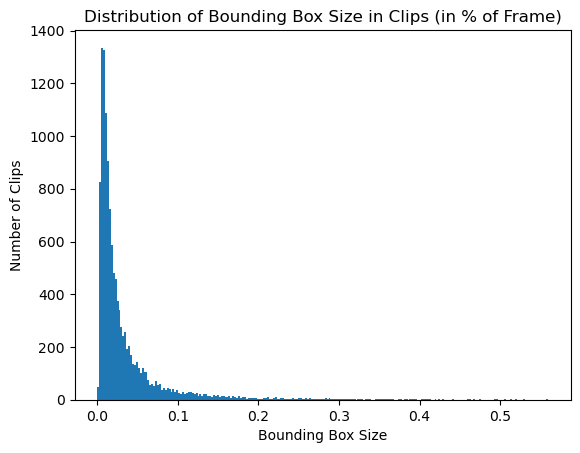

In [82]:
avg_bbox_size = [clip.avg_bbox_size() / (1920 * 1080) for clip in clips]
print(sum(avg_bbox_size) / len(avg_bbox_size))
plt.hist(avg_bbox_size, bins="auto")
plt.title("Distribution of Bounding Box Size in Clips (in % of Frame)")
plt.xlabel("Bounding Box Size")
plt.ylabel("Number of Clips")
plt.show()

20683831


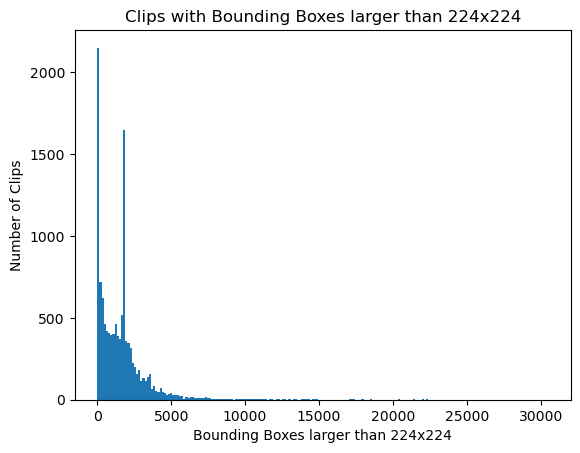

In [81]:
large_enough = [clip.bboxes_above_size(224.0 * 224.0) for clip in clips]
print(sum(large_enough))
plt.hist(large_enough, bins="auto")
plt.title("Clips with Bounding Boxes larger than 224x224")
plt.xlabel("Bounding Boxes larger than 224x224")
plt.ylabel("Number of Clips")
plt.show()

In [83]:
print(224.0 * 224.0 / (1920 * 1080))

0.02419753086419753
